# Exploring Data with Pandas

In this notebook we'll explore a Nobel prize dataset (2016), looking for interesting patterns, stories to tell, and anything else that could form the basis for an interesting
visualization.

First off, let’s try to clear our minds and take a long, hard look at the
data to hand to get a broad idea of the visualizations suggested.
Below we see the form of the Nobel dataset, with categorical,
temporal, and geographical data.

The data above suggests a number of stories we might
want to investigate, among them:

- Gender disparities among the prize winners
- National trends (e.g., which country has most prizes in Economics)
- Details about individual winners, such as their average age on receiving the prize or life expectancy
- Geographical journey from place of birth to adopted country using the born_in and country fields

These investigative lines form the basis for the coming sections,
which will probe the dataset by asking questions of it, such as “How
many women other than Marie Curie have won the Nobel Prize for
Physics?”, “Which countries have the most prizes per capita rather
than absolute?”, and “Is there a historical trend to prizes by nation, a
changing of the guard from old (science) world (big European
nations) to new (US and upcoming Asians)?” Before beginning our
explorations, let’s set up IPython and load our Nobel Prize dataset.

In [ ]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib
import seaborn as sns

In [2]:
# Matplotlib allows many stles (see https://towardsdatascience.com/styling-pandas-plots-and-charts-9b4721e9e597)
matplotlib.style.use('seaborn')
# A few notebook customisations
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = '14'


/var/folders/6c/dyyvnpq12xq0w61ycdhc2blh0000gn/T/ipykernel_1682/4041252848.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


In [77]:
df = pd.read_json(open('data/nobel_winners_cleaned.json'))

In [78]:
df.head()

,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year,award_age
0,Physiology or Medicine,Argentina,1927-10-08T00:00:00.000Z,2002-03-24T00:00:00.000Z,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984,57
1,Peace,Belgium,1829-07-26T00:00:00.000Z,1912-10-06T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909,80
2,Literature,Belgium,1862-08-29T00:00:00.000Z,1949-05-06T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,Maurice Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911,49
3,Peace,Belgium,1854-04-22T00:00:00.000Z,1943-05-14T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Henri_La_Fontaine,Henri La Fontaine,Brussels,Belgium,"Henri La Fontaine , Peace, 1913",1913,59
4,Physiology or Medicine,Belgium,1870-06-13T00:00:00.000Z,1961-04-06T00:00:00.000Z,male,http://en.wikipedia.org/wiki/Jules_Bordet,Jules Bordet,"Soignies, Belgium",None,"Jules Bordet , Physiology or Medicine, 1919",1919,49


Let’s get some basic information about our dataset’s structure:

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        858 non-null    object
 1   country         858 non-null    object
 2   date_of_birth   858 non-null    object
 3   date_of_death   559 non-null    object
 4   gender          858 non-null    object
 5   link            858 non-null    object
 6   name            858 non-null    object
 7   place_of_birth  831 non-null    object
 8   place_of_death  524 non-null    object
 9   text            858 non-null    object
 10  year            858 non-null    int64 
 11  award_age       858 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 80.6+ KB


In [76]:
df.describe()

KeyError: 'born_in'

Note that our dates of birth and death columns have the standard
Pandas datatype of object . In order to make date comparisons, we’ll
need to convert those to the datetime type, datetime64 . We can use
Pandas’ to_datetime method to achieve this conversion:

In [6]:
# convert the date columns to a usable form
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   category        858 non-null    object             
 1   country         858 non-null    object             
 2   date_of_birth   858 non-null    datetime64[ns, UTC]
 3   date_of_death   559 non-null    datetime64[ns, UTC]
 4   gender          858 non-null    object             
 5   link            858 non-null    object             
 6   name            858 non-null    object             
 7   place_of_birth  831 non-null    object             
 8   place_of_death  524 non-null    object             
 9   text            858 non-null    object             
 10  year            858 non-null    int64              
 11  award_age       858 non-null    int64              
dtypes: datetime64[ns, UTC](2), int64(2), object(8)
memory usage: 80.6+ KB


## Plotting with Pandas
Both Pandas Series and DataFrame s have integrated plotting, which
wraps the most common Matplotlib charts, a few of which we
explored in the last chapter. This makes it easy to get quick visual
feedback as you interact with your DataFrame . And if you want to
visualize something a little more complicated, the Pandas containers
will play nicely with vanilla Matplotlib. You can also adapt the plots
produced by Pandas using standard Matplotlib customizations.

Let’s look at an example of Pandas’ integrated plotting, starting with
a basic plot of gender disparity in Nobel Prize wins. Notoriously, the
Nobel Prize has been distributed unequally among the sexes. Let’s
get a quick feel for that disparity by using a bar plot on the gender
category. This shows a the huge difference, with men receiving 811 of the 858 prizes in our dataset.

In [8]:
by_gender = df.groupby('gender')

<Axes: xlabel='gender'>

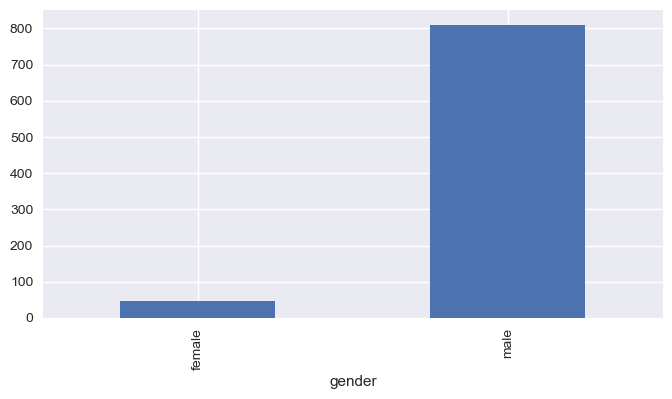

In [9]:
by_gender.size().plot(kind='bar')

In [10]:
by_gender.size()

gender
female     47
male      811
dtype: int64

## Gender Disparities
Let’s break down the gender numbers shown by cate‐
gory of prize. Pandas’ groupby method can take a list of columns to
group by, with each group being accessed by multiple keys.

In [11]:
by_cat_gen = df.groupby(['category', 'gender'])
by_cat_gen.get_group(('Physics', 'female'))[['name', 'year']]

,name,year
267,Maria Goeppert-Mayer,1963
614,Marie Skłodowska-Curie,1903


Using the size method to get the size of these groups returns a Series with a MultiIndex that labels the values by both category and
gender:

In [12]:
by_cat_gen.size()

category                gender
Chemistry               female      4
                        male      167
Economics               female      1
                        male       74
Literature              female     13
                        male       93
Peace                   female     16
                        male       87
Physics                 female      2
                        male      199
Physiology or Medicine  female     11
                        male      191
dtype: int64

<Axes: ylabel='category,gender'>

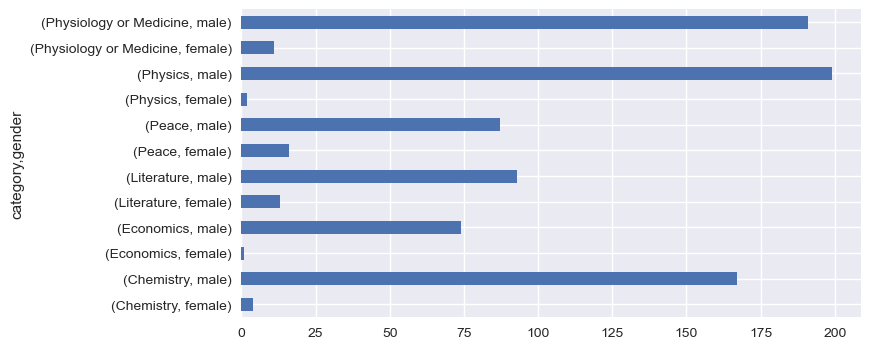

In [13]:
by_cat_gen.size().plot(kind='barh')

## Unstacking Groups
The previous figure isn't the easiest chart to read, even were we to improve
the sorting of the bars. Handily, Pandas Series have a cool unstack
method that takes the multiple indices—in this case, gender and cat‐
egory—and uses them as columns and indices, respectively, to create
a new DataFrame . Plotting this DataFrame gives a much more usable
plot, as it compares prize wins by gender. 

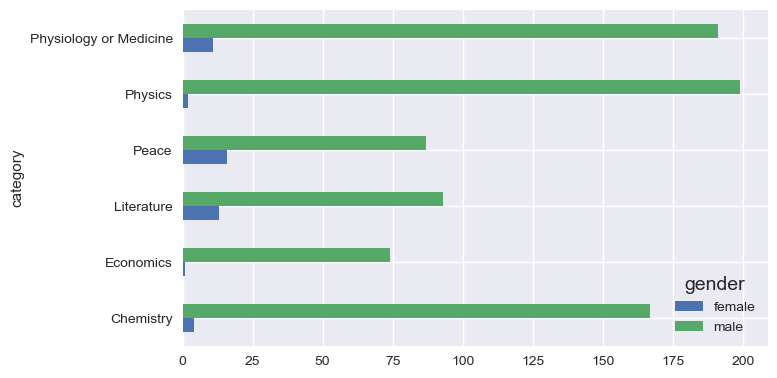

In [14]:
by_cat_gen.size().unstack().plot(kind='barh')
plt.tight_layout()
plt.savefig('dvpj_1103.png', dpi=300)

Let’s improve that figure by ordering the bar groups by number of
female winners (low to high) and adding a total winners bar group
for comparison:

In [15]:
# unstack the group to produce a DataFrame
cat_gen_sz = by_cat_gen.size().unstack()
print(cat_gen_sz.head())

gender      female  male
category                
Chemistry        4   167
Economics        1    74
Literature      13    93
Peace           16    87
Physics          2   199


In [16]:
cat_gen_sz['ratio'] = cat_gen_sz.female /\
                      (cat_gen_sz.female + cat_gen_sz.male)
print(cat_gen_sz.head())

gender      female  male     ratio
category                          
Chemistry        4   167  0.023392
Economics        1    74  0.013333
Literature      13    93  0.122642
Peace           16    87  0.155340
Physics          2   199  0.009950


In [17]:
cat_gen_sz['female_pc'] = cat_gen_sz['ratio'] * 100
cat_gen_sz.head()

gender,female,male,ratio,female_pc
category,,,,
Chemistry,4,167,0.023392,2.339181
Economics,1,74,0.013333,1.333333
Literature,13,93,0.122642,12.264151
Peace,16,87,0.155340,15.533981
Physics,2,199,0.009950,0.995025


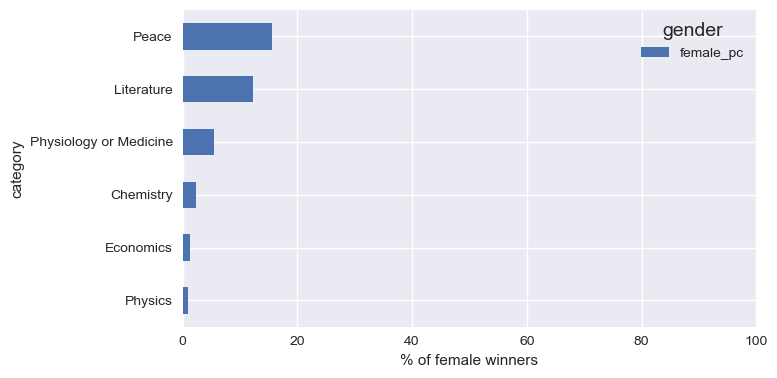

In [18]:
cat_gen_sz = cat_gen_sz.sort_values(by='female_pc', ascending=True)
ax = cat_gen_sz[['female_pc']].plot(kind='barh')
ax.set_xlim([0, 100])
ax.set_xlabel('% of female winners')
plt.tight_layout()
plt.savefig('dvpj_1104.png', dpi=300)

Now plot the columns using the dataframe's built in barchart, first sorting the bars by number of female winners

Ignoring Economics, a recent and contentious addition to the Nobel
Prize categories, the figure shows that the largest discrepancy in
the number of male and female prize winners is in Physics, with
only two female winners. Let’s remind ourselves who they are:

In [19]:
df[(df.category == 'Physics') & (df.gender == 'female')]\
[['name', 'country','year']]

,name,country,year
267,Maria Goeppert-Mayer,United States,1963
614,Marie Skłodowska-Curie,Poland,1903


## Historical Trends
It would be interesting to see if there has been any increase in female
prize allocation in recent years. One way to visualize this would be
as grouped bars over time. Let’s run up a quick plot, using unstack
as before but using the year and gender columns.

<Axes: xlabel='year'>

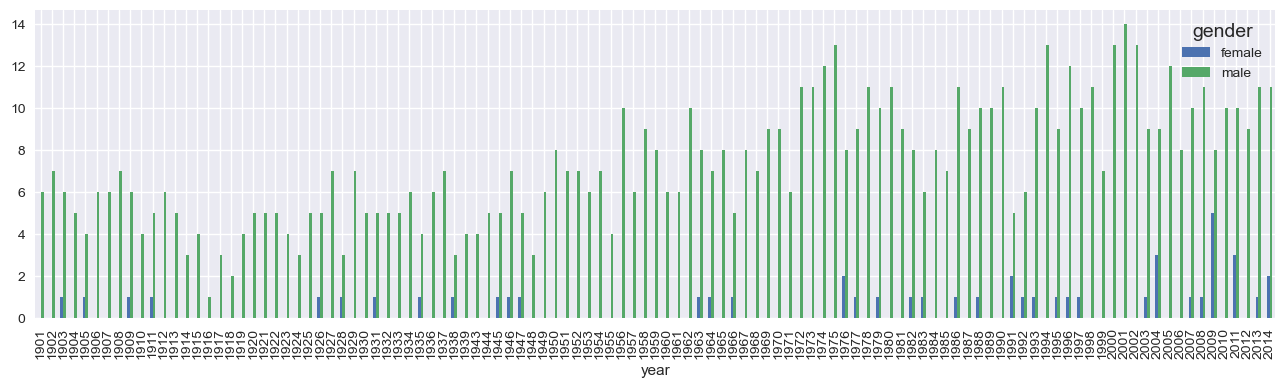

In [20]:
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16,4))

The first thing we need to do is reduce the number of x-axis labels.
By default, Matplotlib will label each bar or bar group of a bar plot,
which in the case of our hundred years of prizes creates a mess of
labels. What we need is the ability to thin out the number of axis
labels as desired. There are various ways to do this in Matplotlib; I’ll
demonstrate the one I’ve found to be most reliable. It’s the sort of
thing you’re going to want to reuse, so it makes sense to stick it in a
dedicated function. Below is a function to reduce the
number of ticks on our x-axis.

In [21]:
def thin_xticks(ax, tick_gap=10, rotation=45):
    """ Thin x-ticks and adjust rotation """
    # Gets the existing locations and labels of the x-ticks, currently
    # one per bar.
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    # Sets the new tick locations and labels at an interval of tick_gap (default 10 ).
    ax.xaxis.set_ticks(ticks[::tick_gap])
    # Rotates the labels for readability, by default on an upward diagonal.
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    ax.figure.show()

As well as needing to reduce the number of ticks, the x-axis in
the last figure has a discontinuous range, missing the years 1939–1945
of WWII, during which no Nobel Prizes were presented. We want to
see such gaps, so we need to set the x-axis range manually to include
all years from the start of the Nobel Prize to the current day.
The current unstacked group sizes use an automatic year index:

In [22]:
by_year_gender = df.groupby(['year', 'gender'])
by_year_gender.size().unstack()

gender,female,male
year,,
1901,NaN,6.0
1902,NaN,7.0
1903,1.0,6.0
1904,NaN,5.0
1905,1.0,4.0
...,...,...
2010,NaN,10.0
2011,3.0,10.0
2012,NaN,9.0


Another problem with the prizes by gender year chart is the excessive number of bars.
Although we do get male and female bars side by side, it looks
messy and has aliasing artifacts too. It’s better to have dedicated
male and female plots but stacked so as to allow easy comparison.
We can achieve this using the subplotting method (see “Axes
and Subplots” on page 263 of DWP&J), using the Pandas data but customizing
the plot using our Matplotlib know-how.

Text(0.5, 0, 'Year')

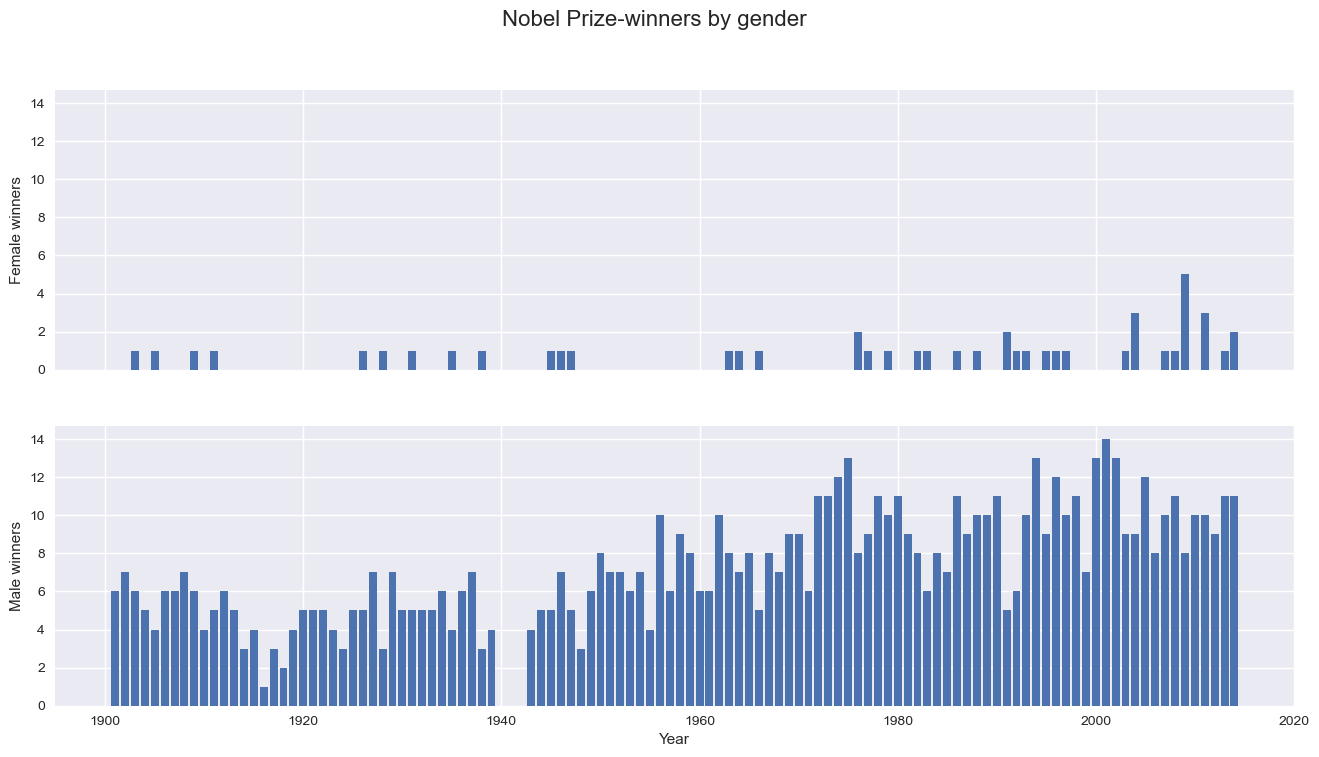

In [23]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_gender = df.groupby(['year','gender'])
# add a contigual numberic index to the grouped dataframe
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)
# we'll create a couple of axes using subplots
fig, axes = plt.subplots(nrows=2, ncols=1,
sharex=True, sharey=True, figsize=(16, 8))
# now we'll use a couple of variables create and label the axes
ax_f = axes[0]
ax_m = axes[1]
fig.suptitle('Nobel Prize-winners by gender', fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners')
ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Male winners')
ax_m.set_xlabel('Year')

## National Trends
The obvious starting point in looking at national trends is to plot the
absolute number of prize winners. This is easily done in one line of
Pandas, broken up here for ease of reading:

<Axes: xlabel='country'>

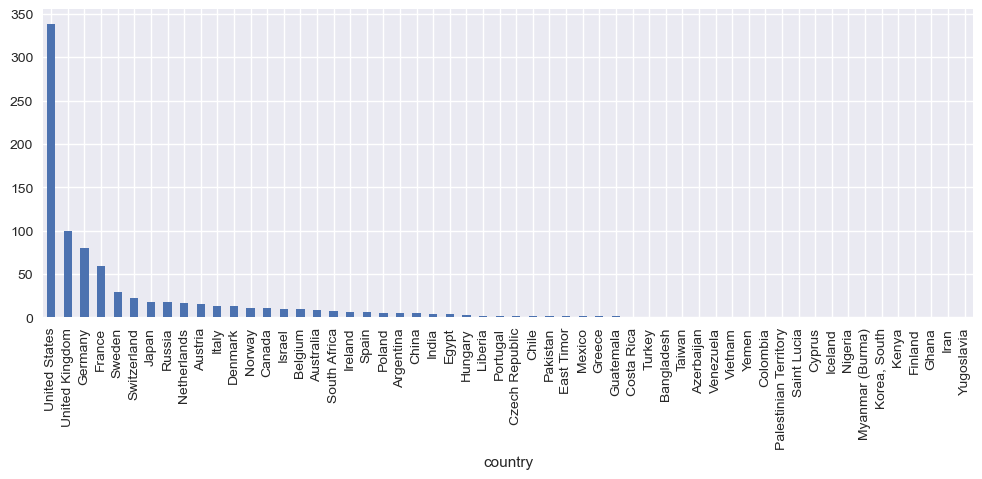

In [24]:
df.groupby('country').size().sort_values(ascending=False)\
.plot(kind='bar', figsize=(12,4))

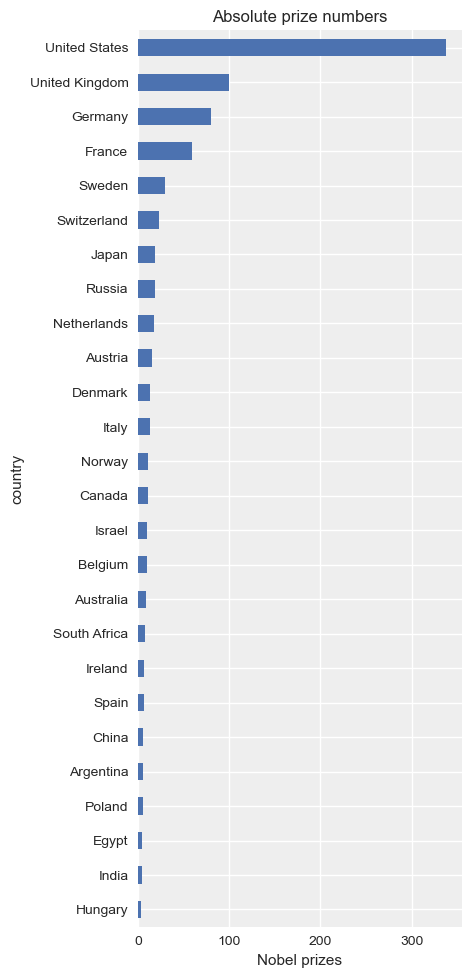

In [25]:
# Plot a horizontal barchart of the first 26 countries, returning the 
# chart's axis, which allows further customization of the chart
ax = df.groupby('country').size().sort_values(ascending=True)\
.tail(26).plot(kind='barh', figsize=(5,10), title="Absolute prize numbers")
ax.set_xlabel("Nobel prizes")
# set the chart's face-color to the hex value for very light grey
ax.set_facecolor("#eee")
# use the tight_layout method before saving the figure - this should
# reduce the chance of missing labels etc.
plt.tight_layout()
# save the plot to the local directory as a png
plt.savefig("country_absolute_prize_numbers.png")

## Prize Winners per Capita
The absolute number of prize winners is bound to favor larger
countries, which raises the question, how do the numbers stack up if
we account for population sizes? In order to test prize haul per cap‐
ita, we need to divide the absolute prize numbers by population size.

First let’s get the national group sizes, with country names as index
labels:

In [26]:
nat_group = df.groupby('country')
ngsz = nat_group.size()
ngsz.head()

country
Argentina      5
Australia      9
Austria       15
Azerbaijan     1
Bangladesh     1
dtype: int64

Now let’s load our country data into a DataFrame and remind ourselves of the data it
contains:

In [28]:
df_countries = pd.read_json('data/winning_country_data.json', orient='index')

In [29]:
df_countries.head()

,gini,name,alpha3Code,area,latlng,capital,population
Turkey,39.0,Turkey,TUR,783562.0,"[39.0, 35.0]",Ankara,76667864
East Timor,31.9,East Timor,TLS,14874.0,"[-8.83333333, 125.91666666]",Dili,1172390
Italy,36.0,Italy,ITA,301336.0,"[42.83333333, 12.83333333]",Rome,60769102
Czech Republic,26.0,Czech Republic,CZE,78865.0,"[49.75, 15.5]",Prague,10521600
Canada,32.6,Canada,CAN,9984670.0,"[60.0, -95.0]",Ottawa,35540419


The index of our country dataset is a country name. If we add our ngsz national group-size Series , which also has a country
name index, the two will combine on the shared indices, giving our
country data a new nobel_wins column. We can then use this new
column to create a nobel_wins_per_capita by dividing it by popu‐
lation size:

In [29]:
df_countries['nobel_wins'] = ngsz
df_countries['nobel_wins_per_capita'] =\
    df_countries.nobel_wins / df_countries.population

We now need only sort the df_countries DataFrame by its new
nobel_wins_per_cap column and plot the Nobel Prize wins per cap‐
ita:

<Axes: >

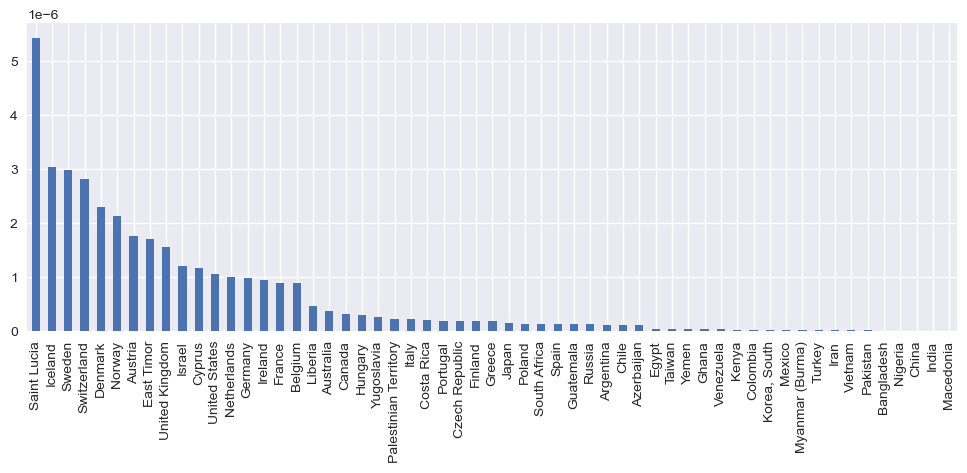

In [30]:
df_countries.sort_values(by='nobel_wins_per_capita', ascending=False)\
.nobel_wins_per_capita.plot(kind='bar', figsize=(12,4))

This shows the Caribbean Island of Saint Lucia taking top place.
Home to the Nobel Prize–winning poet Derek Walcott, its small
population of 175,000 gives it a high Nobel Prizes per capita.
Let’s see how things stack up with the larger countries by filtering
the results for countries that have won more than two Nobel Prizes:

<Axes: >

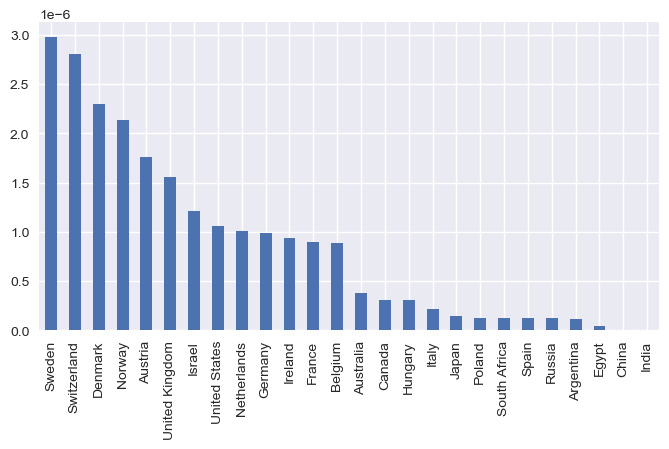

In [31]:
# filter for countries with more than two Nobel prizes
df_countries[df_countries.nobel_wins > 2]\
.sort_values(by='nobel_wins_per_capita', ascending=False)\
.nobel_wins_per_capita.plot(kind='bar')

Changing the metric for national prize counts from absolute to per
capita makes a big difference. Let’s now refine our search a little and
focus on the prize categories, looking for interesting nuggets there.

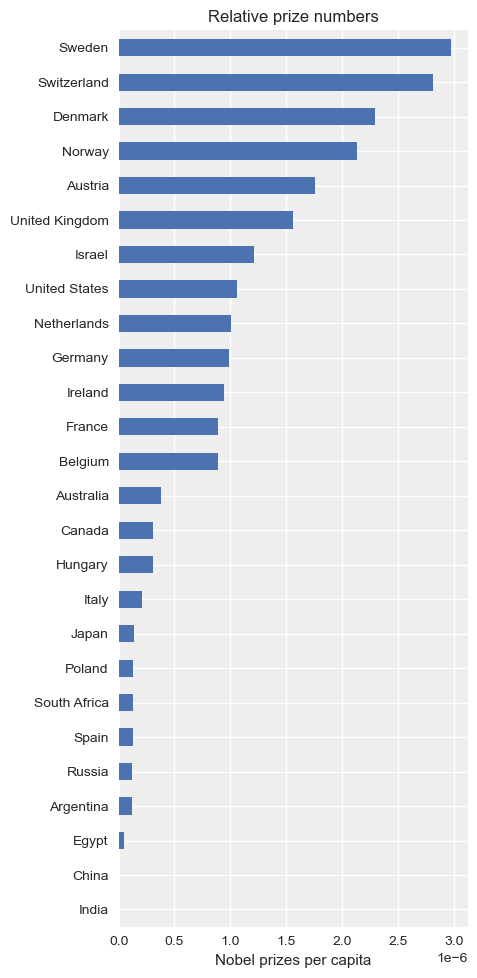

In [32]:
ax = df_countries[df_countries.nobel_wins > 2]\
.sort_values(by='nobel_wins_per_capita', ascending=True)\
.nobel_wins_per_capita.plot(kind='barh', figsize=(5, 10), title="Relative prize numbers")
ax.set_xlabel("Nobel prizes per capita")
ax.set_facecolor("#eee")
plt.tight_layout()
plt.savefig("country_relative_prize_numbers.png")

Let's take our adapted countries dataframe and convert it to JSON, using the `orient` property to specify an array of objects, each representing a row of our dataframe. Such arrays are the common way of consuming datasets in JavaScript, particulary when using D3.

The resulting string can be copied and into a JavaScript file where the JSON.loads method can load the string into its JavaScript mirror.

![Nobel winners](country_absolute_prize_numbers.png "Nobel Prize Winners")

## Prizes by Category
Let’s drill down a bit into the absolute prize data and look at wins by category. This will require grouping by country and category columns, getting the size of those groups, unstacking the resulting Series and then plotting the columns of the resulting DataFrame . First
we get our categories with country group sizes:

In [33]:
nat_cat_sz = df.groupby(['country', 'category']).size().unstack()
nat_cat_sz[:5] # take the first five countries by category

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,2.0
Australia,NaN,1.0,1.0,NaN,1.0,6.0
Austria,3.0,1.0,1.0,2.0,4.0,4.0
Azerbaijan,NaN,NaN,NaN,NaN,1.0,NaN
Bangladesh,NaN,NaN,NaN,1.0,NaN,NaN


We then use the nat_cat_sz DataFrame to produce subplots for the
six Nobel Prize categories:

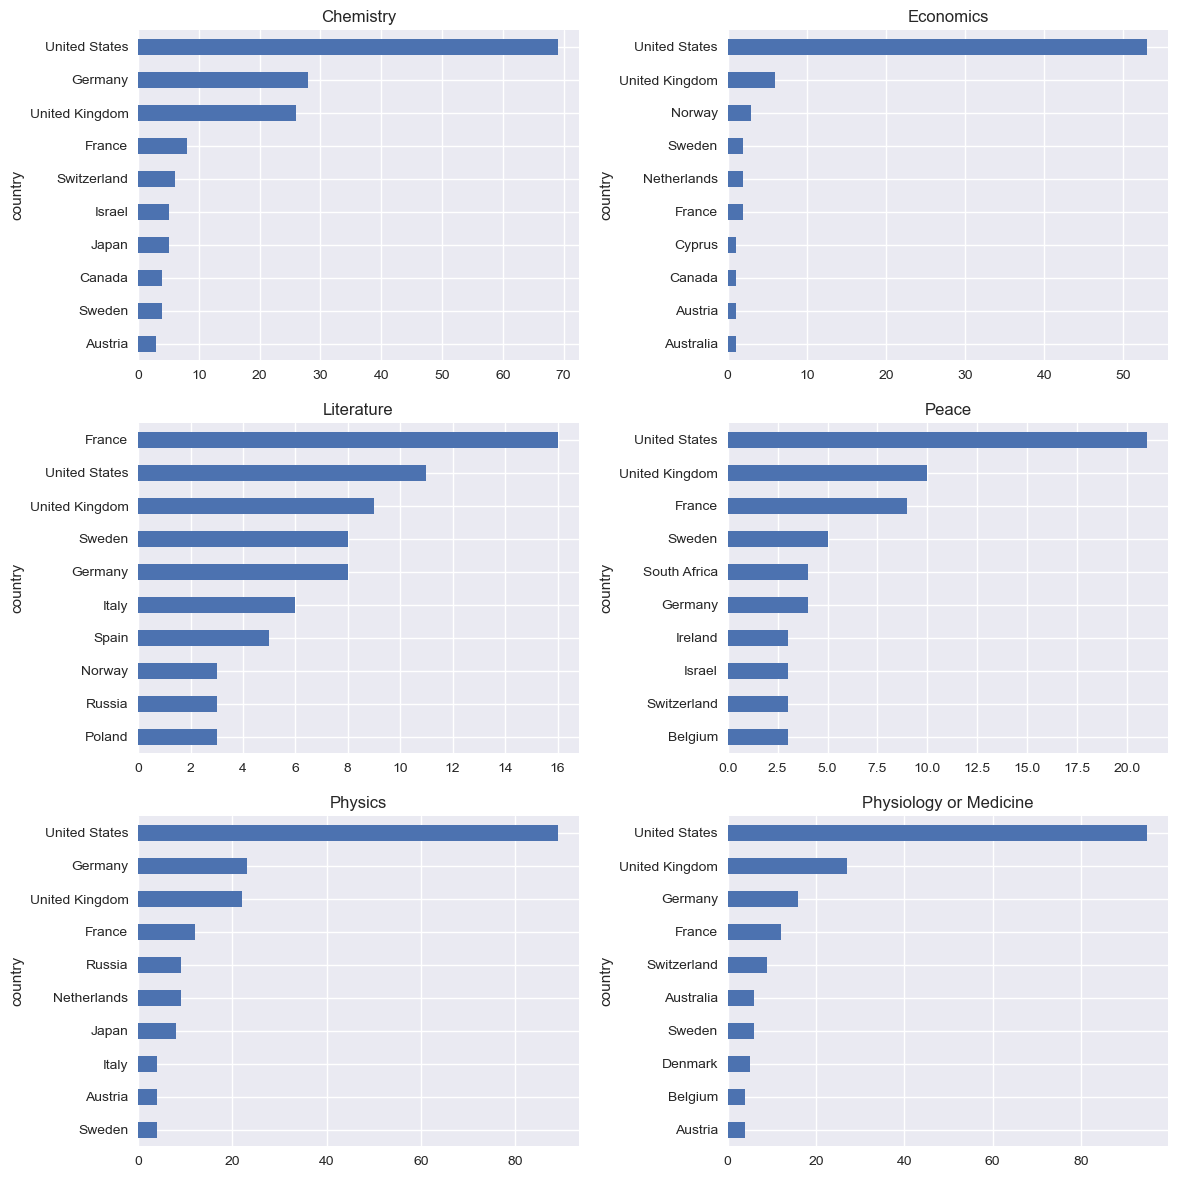

In [34]:
COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
# iteritems returns an iterator for the DataFrames columns in
# the form of (column_label, column) tuples.
for i, (label, col) in enumerate(nat_cat_sz.items()):
    ax = axes[i//COL_NUM, i%COL_NUM]
    # sort by size and take the first ten
    col = col.sort_values(ascending=False)[:10]
    col = col.sort_values(ascending=True) # reverse to make bars grow from bottom->top
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
plt.tight_layout()
plt.savefig('dvpj_1110.png', dpi=300)

A couple of interesting nuggets from the figure are the United
States’ overwhelming dominance of the Economics prize, reflecting
a post-WWII economic consensus, and France’s leadership of the
Literature prize.

## Historical Trends in Prize Distribution
Now that we know the aggregate prize stats by country, are there any
interesting historical trends to the prize distribution? Let’s explore
this with some line plots.
First, let’s increase the default font size to 20 points to make the plot
labels more legible:

In [35]:
# increase the font size 
plt.rcParams['font.size'] = 20

We’re going to be looking at prize distribution by year and country,
so we’ll need a new unstacked DataFrame based on these two col‐
umns. As previously, we add a new_index to give continuous years:

In [36]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_nat_sz = df.groupby(['year', 'country'])\
.size().unstack().reindex(new_index)

The trend we’re interested in is the cumulative sum of Nobel Prizes
by country over its history. We can further explore trends in indi‐
vidual categories, but for now we’ll look at the total for all. Pandas
has a handy cumsum method for just this. Let’s take the United States
column and plot it:

<Axes: xlabel='year'>

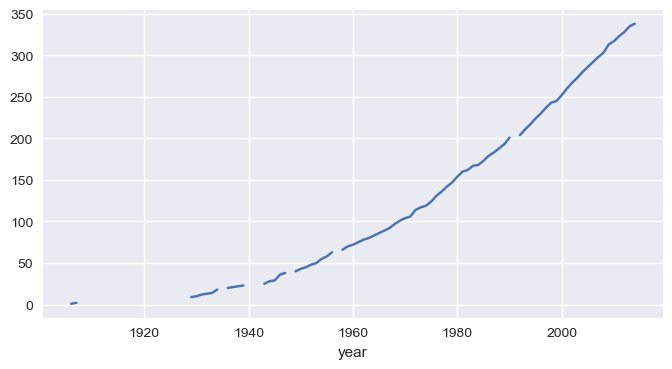

In [37]:
by_year_nat_sz['United States'].cumsum().plot()

The gaps in the line plot are where the fields are NaN , years when the
US won no prizes. The cumsum algorithm returns NaN here. Let’s fill
those in with a zero to remove the gaps:

<Axes: xlabel='year'>

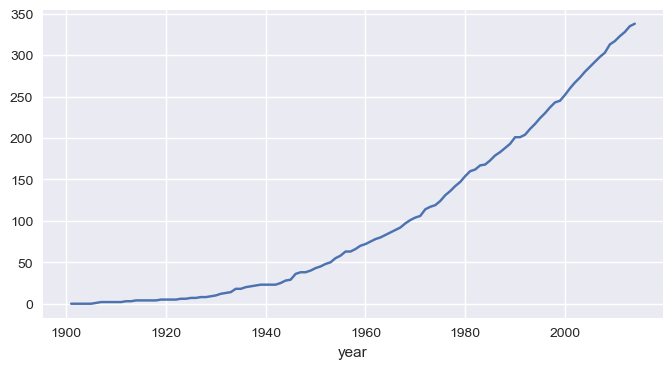

In [38]:
by_year_nat_sz['United States'].fillna(0).cumsum().plot()

Let’s compare the US prize rate with that of the rest of the world:

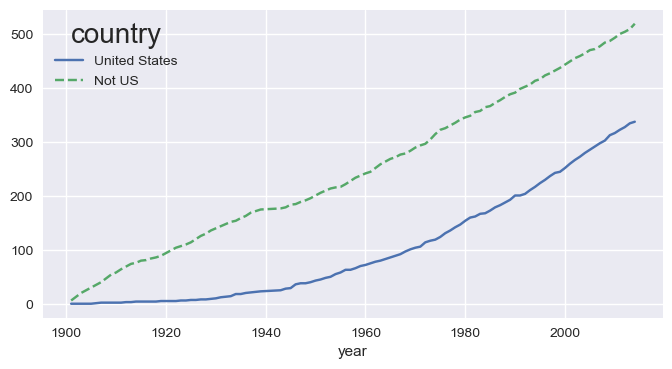

In [39]:
by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().fillna(0)
# Get the list of country column names and remove United States.
not_US = by_year_nat_sz.columns.tolist()
not_US.remove('United States')
# Uses our list of non-US country names to create a 'Not_US' column, 
# the sum of all the prizes for countries in the not_US list.
by_year_nat_sz['Not US'] = by_year_nat_sz[not_US].sum(axis=1)
ax = by_year_nat_sz[['United States', 'Not US']].cumsum().plot(style=['-', '--'])

Where the 'Not_US' haul shows a steady increase over the years of
the prize, the US shows a rapid increase around the end of World
War II. Let’s investigate that further, looking at regional differences.
We’ll focus on the two or three largest winners for North America,
Europe, and Asia:

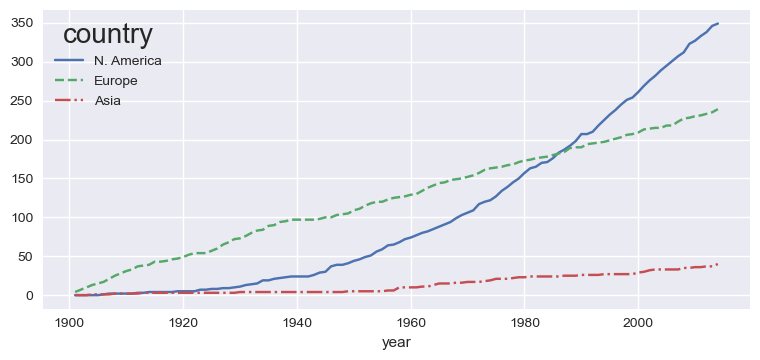

In [40]:
by_year_nat_sz = df.groupby(['year', 'country'])\
.size().unstack().reindex(new_index).fillna(0)

# Our continental country list created by selecting the biggest two
# or three winners in the three continents compared.
regions = [
{'label':'N. America',
'countries':['United States', 'Canada']},
{'label':'Europe',
'countries':['United Kingdom', 'Germany', 'France']},
{'label':'Asia',
'countries':['Japan', 'Russia', 'India']}
]

# Creates a new column with a region label for each dict in the
# regions list, summing its countries members.
for region in regions:
    by_year_nat_sz[region['label']] =\
    by_year_nat_sz[region['countries']].sum(axis=1)
# Plots the cumulative sum of all the new region columns.    
by_year_nat_sz[[r['label'] for r in regions]].cumsum().plot(style=['-', '--', '-.'])
# To save any charts, apply a tight layout first
plt.gcf().set_tight_layout(True)
plt.savefig('11-14.png', dpi=300)

The rate of Asia’s prize haul
has increased slightly over the years, but the main point of note is
North America’s huge increase in prizes around the mid-1940s,
overtaking a declining Europe in total prizes around the mid-1980s.

Let’s improve the resolution of the previous national plots by sum‐
marizing the prize rates for the 16 biggest winners, excluding the
outlying United States:

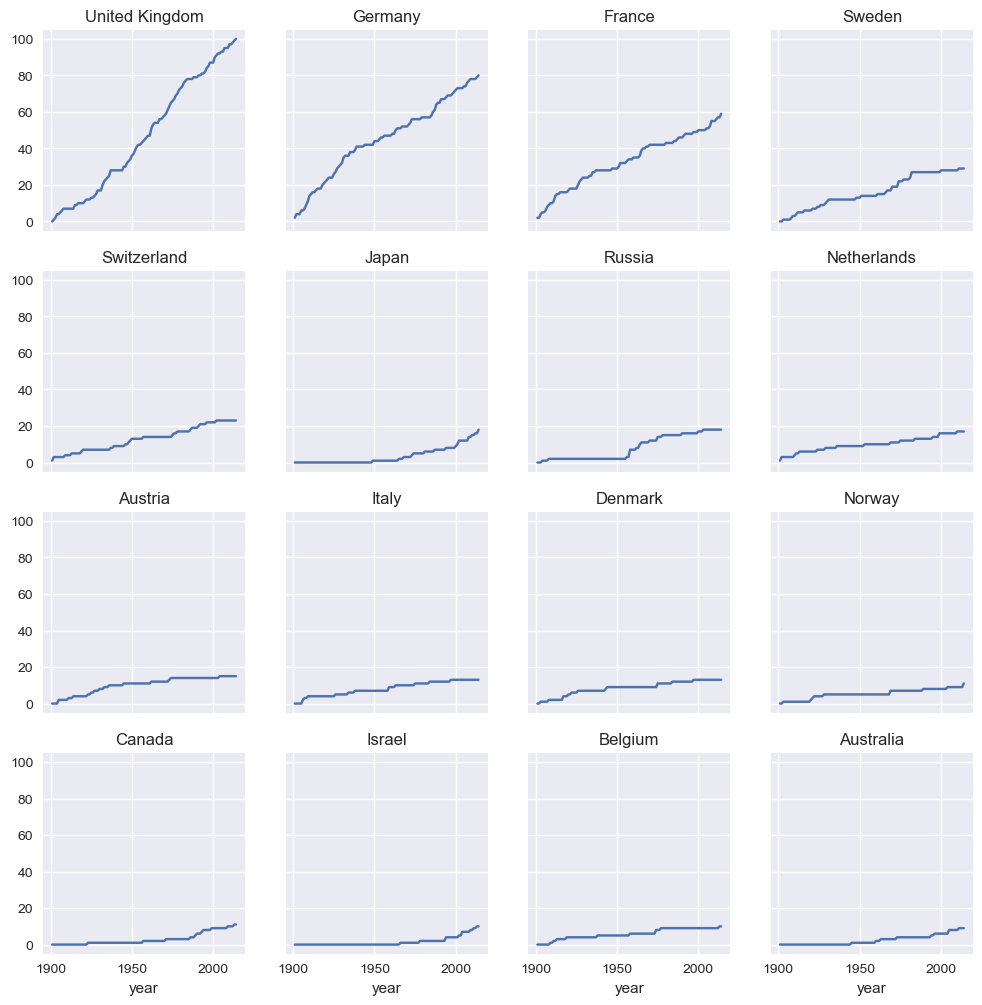

In [41]:
COL_NUM = 4 
ROW_NUM = 4

# Sorts our country groups from highest to lowest win hauls.
by_nat_sz = df.groupby('country').size()
by_nat_sz.sort_values(ascending=False, inplace=True)

# Gets a 4×4 grid of axes with shared x- and y-axes for normalized comparison.
fig, axes = plt.subplots(COL_NUM, ROW_NUM,\
sharex=True, sharey=True,
figsize=(12,12))

# elects the nat country name column and plots its cumulative
# sum of prizes on the grid axis ax .
for i, nat in enumerate(by_nat_sz.index[1:17]):
    ax = axes[int(i/COL_NUM), i%ROW_NUM]
    by_year_nat_sz[nat].cumsum().plot(ax=ax)
    ax.set_title(nat)

This figure shows some nations like Japan,
Australia, and Israel on the rise historically, while others flatten off.

In [42]:
import seaborn as sns

Another good way to summarize national prize rates over time is by
using a heatmap and dividing the totals by decade. This division is
also known as binning, as it creates bins of data. Pandas has a handy
cut method for just this job, taking a column of continuous values—
in our case, Nobel Prize years—and returning ranges of a specified
size. You can supply the DataFrame ’s groupby method with the result
of cut and it will group by the range of indexed values.

<Axes: xlabel='year', ylabel='country'>

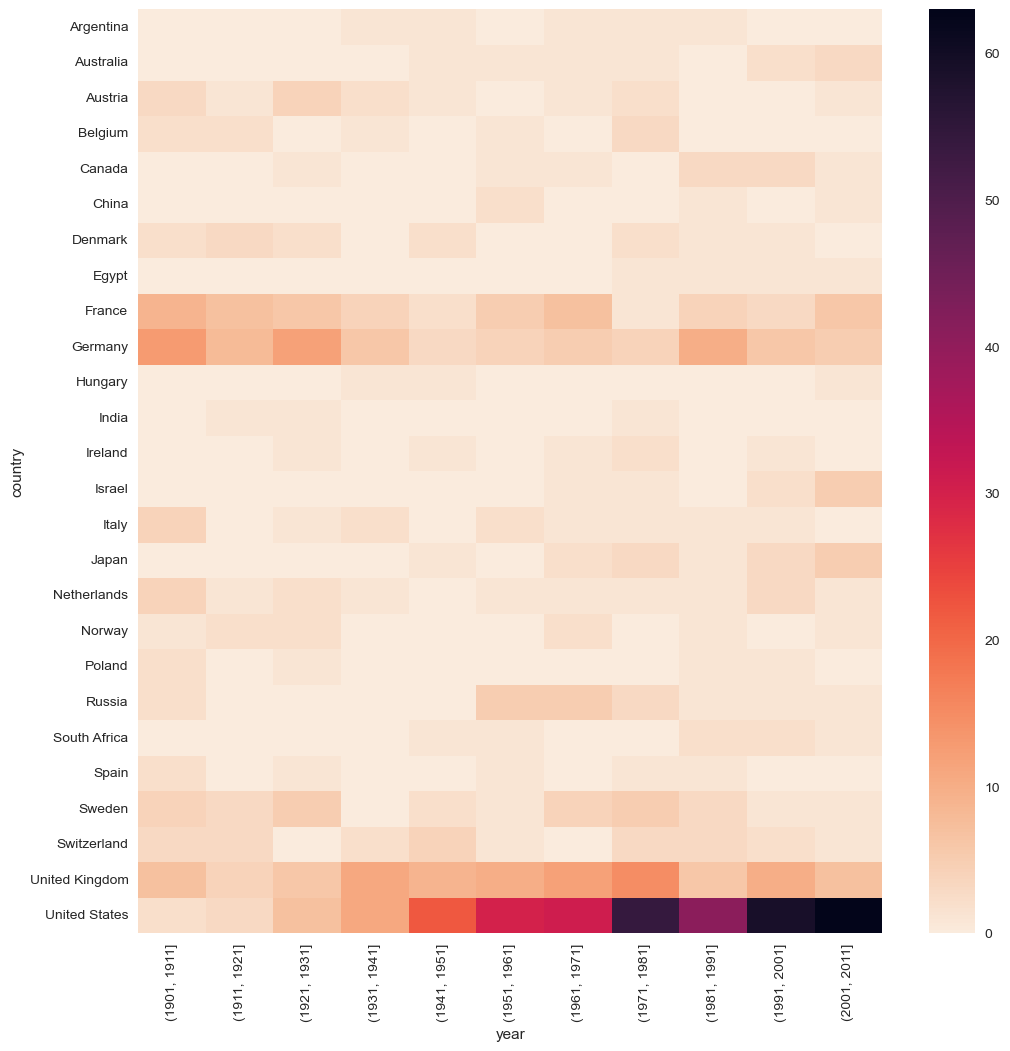

In [43]:
# Gets our bin ranges for the decades from 1901 (1901, 1911, 1921...).
bins = np.arange(df.year.min(), df.year.max(), 10)
# Cuts our Nobel Prize years into decades using the bins ranges
# with precision set to 0 , to give integer years.
by_year_nat_binned = df.groupby(['country', pd.cut(df.year, bins, precision=0)])\
  .size().unstack().fillna(0)
plt.figure(figsize=(12,12))
# Before heatmapping, we filter for those countries with over two Nobel Prizes.
sns.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2], cmap='rocket_r')

The figure above captures some interesting trends, such as Russia’s brief
flourishing in the 1950s, which petered out around the 1980s.
Now that we’ve investigated the Nobel Prize nations, let’s turn our
attention to the individual winners. Are there any interesting things
we can discover about them using the data at hand?

## Age and Life Expectancy of Winners
We have the date of birth for all our winners and the date of death
for 559 of them. Combined with the year in which they won their
prizes, we have a fair amount of individual data to mine. Let’s inves‐
tigate the age distribution of winners and try to glean some idea of
the winners’ longevity.
### Age at Time of Award
Let's use a quick and easy Pandas’ histogram plot to assess this
distribution:

<Axes: >

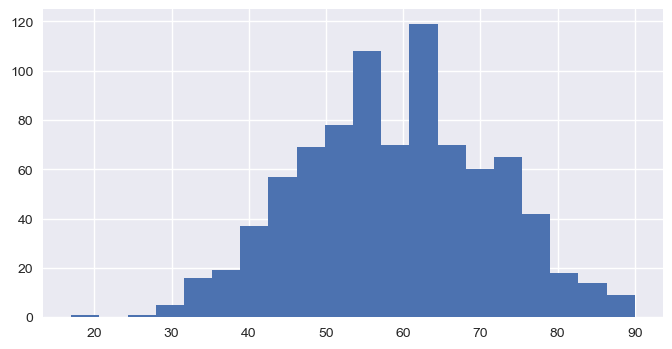

In [44]:
df['award_age'].hist(bins=20)

Here we require that the age data be divided into 20 bins. The figure shows that the early 60s is a sweet spot for the
prize and if you haven’t achieved it by 100, it probably isn’t going to
happen. Note the outlier around 20, which is the recently awarded
17-year-old recipient of the Peace Prize, Malala Yousafzai.

We can use Seaborn’s distplot to get a better feel for the distribu‐
tion, adding a kernel density estimate (KDE) to the histogram (see [Wikipedia for an explanation of kernel density estimates](https://en.wikipedia.org/wiki/Kernel_density_estimation)). The
following one-liner produces a chart showing that our sweet
spot is around 60 years of age:

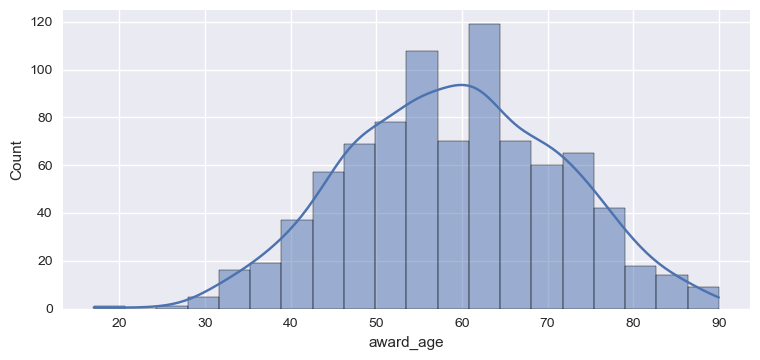

In [45]:
sns.displot(df['award_age'], kde = True, height=4, aspect=2)

A box plot is a good way of visualizing continuous data, showing the
quartiles, the first and third marking the edges of the box and the
second quartile (or median average) marking the line in the box.
Generally, as in the figure below, the horizontal end lines (known as the
whisker ends) indicate the max and min of the data. Let’s use a Sea‐
born box plot and divide the prizes by gender:

<Axes: xlabel='gender', ylabel='award_age'>

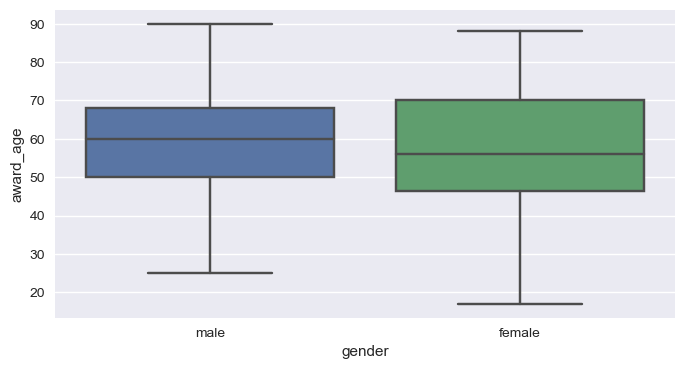

In [46]:
sns.boxplot(x = "gender", y = "award_age", data=df)

This plot show that the distributions by
gender are similar, with women having a slightly lower average age.
Note that with far fewer female prize winners, their statistics are
subject to a good deal more uncertainty.

Seaborn’s rather nice violinplot combines the conventional box plot
with a kernel density estimation to give a more refined view of the
breakdown by age and gender. The following one-liner provides the required breakdonw by award age and gender:

<Axes: xlabel='gender', ylabel='award_age'>

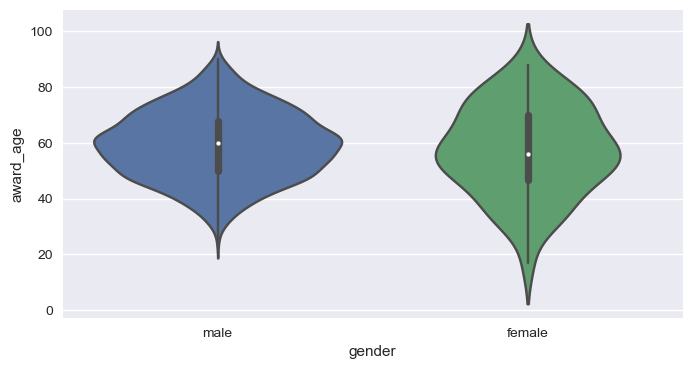

In [47]:
sns.violinplot(x = "gender", y = "award_age", data = df)

### Life Expectancy of Winners
Now let’s look at the longevity of Nobel Prize winners, by subtract‐
ing the available dates of death from their respective dates of birth.
We’ll store this data in a new 'age_at_death' column:

In [48]:
df['age_at_death'] = (df.date_of_death - df.date_of_birth)\
.dt.days/365

We make a copy of the 'age_at_death' column, 3 removing all
empty NaN rows. This can then be used to make a histogram with KDE:

In [49]:
age_at_death = df[df.age_at_death.notnull()].age_at_death

We can use this column (a Panda's Series) directly with Seaborn's displot to see the age distribution at time of death:

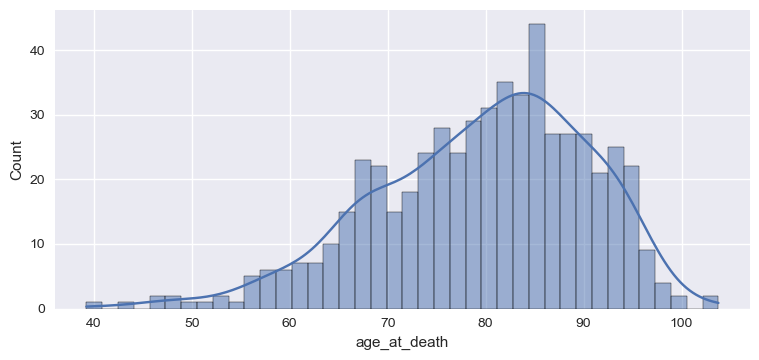

In [50]:
sns.displot(age_at_death, bins=40, kde=True, height=4, aspect=2)

This chart shows the Nobel Prize winners to be a remarkably
long-lived bunch, with an average age in the early 80s. This is all the
more impressive given that the large majority of winners are men,
who have considerably lower average life expectancies in the general
population than women. One contributary factor to this longevity is
the selection bias we saw earlier. Nobel Prize winners aren’t gener‐
ally honored until they’re in their late 50s and 60s, which removes
the subpopulation who died before having the chance to be
acknowledged, pushing up the longevity figures.

The histogram shows some centenarians among the prize winners.
Let’s find them:

In [51]:
df[df.age_at_death > 100][['name', 'category', 'year']]

,name,category,year
101,Ronald Coase,Economics,1991
329,Rita Levi-Montalcini,Physiology or Medicine,1986


Now let’s superimpose a couple of KDEs to show differences in mor‐
tality for male and female recipients. 

First we remove the null rows and store as a new, temporary DataFrame:

In [52]:
df_temp = df[df.age_at_death.notnull()]

We use d_temp to make two shaded kdeplots, one for each gender:

/var/folders/6c/dyyvnpq12xq0w61ycdhc2blh0000gn/T/ipykernel_1682/732826823.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_temp[(df_temp.gender == 'male')]\
/var/folders/6c/dyyvnpq12xq0w61ycdhc2blh0000gn/T/ipykernel_1682/732826823.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_temp[(df_temp.gender == 'female')]\


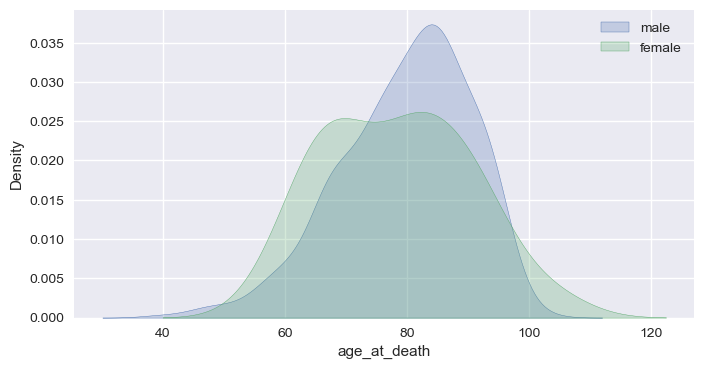

In [53]:
sns.kdeplot(df_temp[(df_temp.gender == 'male')]\
            .age_at_death, shade=True, label='male')
sns.kdeplot(df_temp[(df_temp.gender == 'female')]\
            .age_at_death, shade=True, label='female')
plt.legend()

A violinplot gives another way of comparing the gender distributions:

<Axes: xlabel='gender', ylabel='age_at_death'>

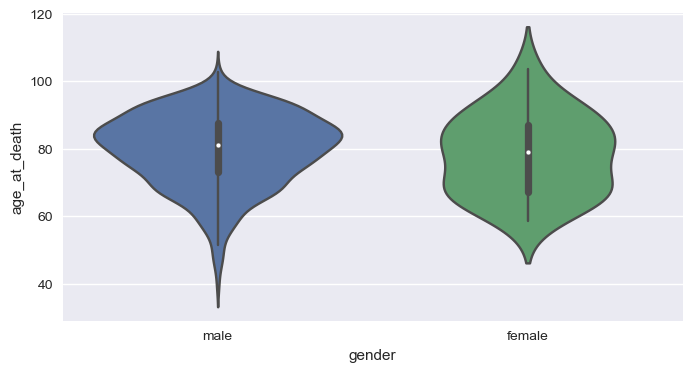

In [54]:
sns.violinplot(x = "gender", y = "age_at_death", data = df)

### Increasing Life Expectancies over Time
Let’s do a little historical demographic analysis by seeing if there’s a
correlation between the date of birth of our Nobel Prize winners and
their life expectancy. We’ll use one of Seaborn’s lmplots to provide a
scatter plot and line-fitting with confidence intervals (see [Seaborn's site](https://seaborn.pydata.org/generated/seaborn.lmplot.html) for more details of the lmplot).

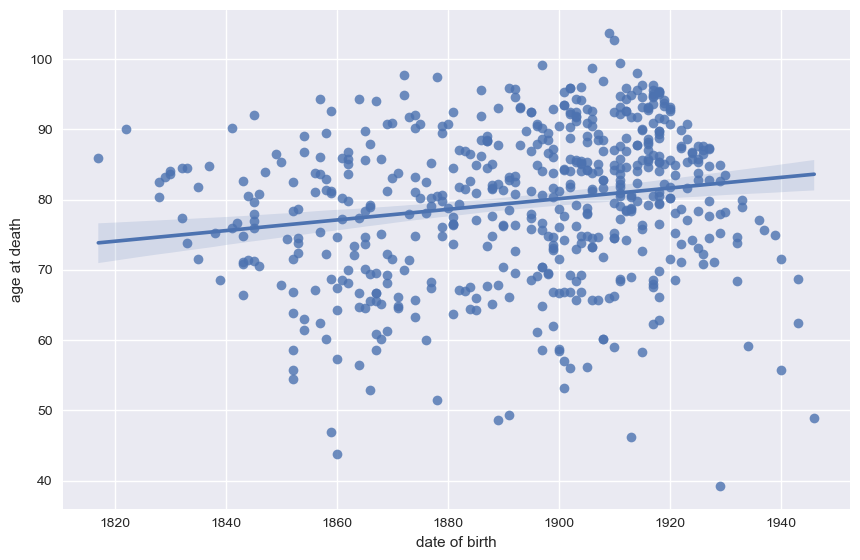

In [55]:
# Create a temporary DataFrame , removing all the rows with no
# 'age_at_death' field.
df_temp=df[df.age_at_death.notnull()]
# Create a new DataFrame with only the two columns of interest
# from the refined df_temp . We grab only the year from the
# date_of_birth , using its dt accessor.
data = pd.DataFrame(
{'age at death':df_temp.age_at_death,
'date of birth':df_temp.date_of_birth.dt.year})
# now plot those two columns against one another to produce a correlation line
sns.lmplot(x = 'date of birth', y = 'age at death', data = data, height=6, aspect=1.5)

This figure shows an increase in life expectancy of a decade or so over the prize’s duration.

## The Nobel Diaspora
A good way to visualize the movement patterns from the winners’
country of birth to their adopted country is by using a heatmap to
show all born_in / country pairs. The following code produces the required
heatmap

In [60]:
df = pd.read_json(open('data/nobel_winners_cleaned.json'))

Text(0.5, 1.0, 'The Nobel Diaspora')

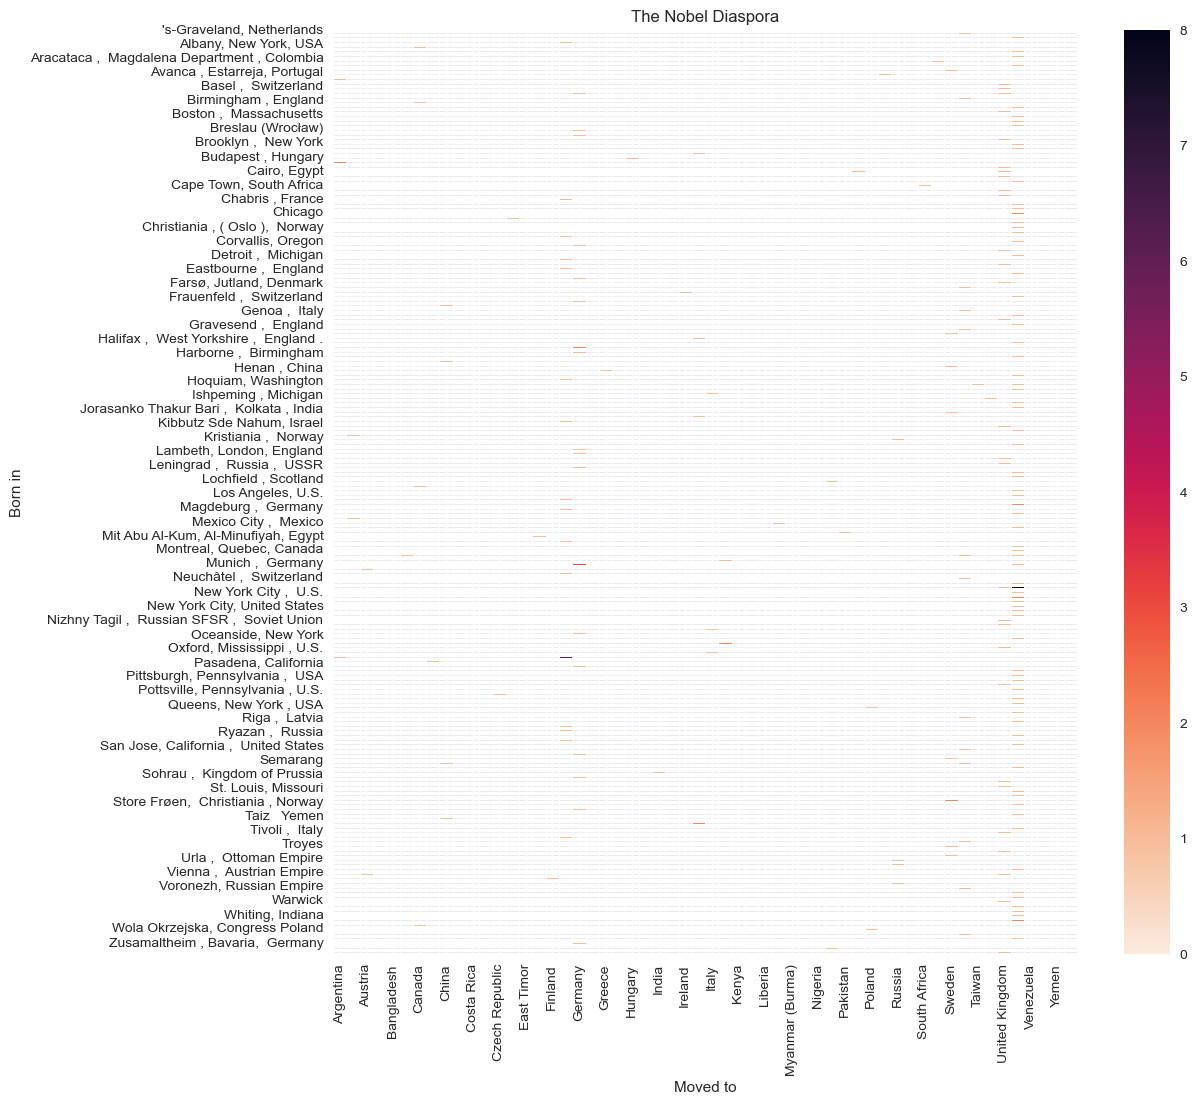

In [63]:
# Selects all rows with a 'born_in' field, and forms groups on
# this and the country column.
by_bornin_nat = df[df.place_of_birth.notnull()].groupby(\
['place_of_birth', 'country']).size().unstack()
# We rename the row index and column names to make them
# more descriptive.
by_bornin_nat.index.name = 'Born in'
by_bornin_nat.columns.name = 'Moved to'
plt.figure(figsize=(12,12))
# Seaborn’s heatmap attempts to set the correct bounds for the
# data, but in this case, we must manually adjust the limits ( vmin
# and vmax ) to see all the cells.
ax = sns.heatmap(by_bornin_nat, vmin=0, vmax=8, cmap="rocket_r", linewidth=0.5)
ax.set_title('The Nobel Diaspora')

The heatmap shows some interesting patterns, which tell a tale of
persecution and sanctuary. First, the United States is the over‐
whelming recipient of relocated Nobel winners, followed by the
United Kingdom. Note that the biggest contingents for both (except
cross-border traffic from Canada) are from Germany. Italy, Hun‐
gary, and Austria are the next largest groups. Examining the individ‐
uals in these groups shows that the majority were displaced as a
result of the rise of antisemitic fascist regimes in the run-up to
World War II and the increasing persecution of Jewish minorities.

Seaborn provides a number of [colormaps](https://seaborn.pydata.org/tutorial/color_palettes.html). Try a few in the heatmap above and see how the differ in their effectiveness for this comparative chart.

In [67]:
df[(df.place_of_birth == 'Germany') & (df.country == 'United Kingdom')][['name', 'date_of_birth', 'category']]

,name,date_of_birth,category


## Summary
In this notebook, we explored our Nobel Prize dataset, probing the key
fields of gender, category, country, and year (of prize) looking for
interesting trends and stories we can tell or enable visually. We used
a fair number of Matplotlib (by way of Pandas) and Seaborn’s plots,
from basic bar charts to more complicated statistical summaries like
violinplots and heatmaps. Mastery of these tools and the others in
the Python chart armory will allow you to quickly get the feel of
your datasets, which is a prerequisite to building a visualization
around them. We found more than enough stories in the data to
suggest a web visualization. In the next chapter we will imagine and
design just such a Nobel Prize winner visualization, cherry-picking
the nuggets gained in this chapter.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   category        858 non-null    object
 1   country         858 non-null    object
 2   date_of_birth   858 non-null    object
 3   date_of_death   559 non-null    object
 4   gender          858 non-null    object
 5   link            858 non-null    object
 6   name            858 non-null    object
 7   place_of_birth  831 non-null    object
 8   place_of_death  524 non-null    object
 9   text            858 non-null    object
 10  year            858 non-null    int64 
 11  award_age       858 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 80.6+ KB


In [69]:
df[(df.country == 'Argentina')][['name', 'date_of_birth', 'category']]

,name,date_of_birth,category
0,César Milstein,1927-10-08T00:00:00.000Z,Physiology or Medicine
854,Carlos Saavedra Lamas,1878-11-01T00:00:00.000Z,Peace
855,Bernardo Houssay,1887-04-10T00:00:00.000Z,Physiology or Medicine
856,Luis Federico Leloir,1906-09-06T00:00:00.000Z,Chemistry
857,Adolfo Pérez Esquivel,1931-11-26T00:00:00.000Z,Peace


In [70]:
df.iloc[0]

category                                    Physiology or Medicine
country                                                  Argentina
date_of_birth                             1927-10-08T00:00:00.000Z
date_of_death                             2002-03-24T00:00:00.000Z
gender                                                        male
link              http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein
name                                                César Milstein
place_of_birth                           Bahía Blanca ,  Argentina
place_of_death                                 Cambridge , England
text                 César Milstein , Physiology or Medicine, 1984
year                                                          1984
award_age                                                       57
Name: 0, dtype: object